In [1]:
import os
import sys
%matplotlib notebook
%matplotlib inline

In [2]:
sys.path.insert(0, 'C:/Users/Aaron/Documents')

In [3]:
import matplotlib.pyplot as plt
import tweepy
import numpy as np
import pandas as pd
import datetime
import time
from pytz import timezone
now = datetime.datetime.now()
east = timezone('US/Eastern')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import TW_consumer_key2, TW_consumer_skey2, TW_access_token2, TW_access_stoken2

# # Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(TW_consumer_key2, TW_consumer_skey2)
auth.set_access_token(TW_access_token2, TW_access_stoken2)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
analyzed = []

In [5]:
def get_user():
    mention_tweets = api.mentions_timeline(count=5)
    if "sentiment" in mention_tweets[0]['text']:
        x = mention_tweets[0]['entities']['user_mentions'][1]['screen_name']
        y = [sub['user'] for sub in analyzed]
        if x in y:
            print('user not in analyzed')
            user_index = next((index for (index, d) in enumerate(analyzed) if d["user"] == x))
            date1 = analyzed[user_index]['tweet_date']
            date2 = datetime.datetime.strptime(date1, '%a %b %d %H:%M:%S %z %Y').strftime('%m/%d/%Y %H:%M')
            date3 = (now.strftime("%m/%d/%Y %H:%M:%S"))
            datepy1= pd.to_datetime(date2)
            datepy2= pd.to_datetime(date3)
            delta = datepy1-datepy2
            try:
                api.update_status(f"@{x} previously analyzed {delta} ago.")
                print(f"@{x} previously analyzed {delta} ago and posted to Twitter")
                return ""
            except:
                print(f"@{x} previously analyzed {delta} ago and not posted to Twitter again")
                return ""
        else:
            analyzed.append({'user':x,
                             'tweet_date':mention_tweets[0]['created_at']})
            print('user not in analyzed')
            return mention_tweets[0]['entities']['user_mentions'][1]['screen_name']
    else:
        pass

In [6]:
# Target User Accounts
def get_tweets(usern):
    target_user = usern
    mention_tweets2 = api.mentions_timeline(count=5)
    requestor = mention_tweets2[0]['user']['name']
    if target_user != "":
        # List for dictionaries of results
        results_list = []
        compound_list = []
        positive_list = []
        negative_list = []
        neutral_list = []
        screenname = []
        tweettext= []
        tweetdate = []
        tweetnumber = []

        # Loop through each user
        #for user in target_user:
        count=0
        # Loop through 5 pages of tweets (total 100 tweets)
        for x in range(1, 26):

            # Get all tweets from home feed
            public_tweets = api.user_timeline(target_user, page=x)

            # Loop through all tweets
            for tweet in public_tweets:
                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]

                # Add each value to the appropriate list
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                screenname.append(tweet["user"]["screen_name"])
                tweettext.append(tweet["text"])
                tweetdate.append(tweet["created_at"])
                count=count-1
                tweetnumber.append(count)

            # Create a dictionaty of results
        user_results = {
            "Screen Name": screenname,
            "Date": tweetdate,
            "Tweet Text": tweettext,
            "Compound Score": compound_list,
            "Postive Score": positive_list,
            "Neutral Score": neutral_list,
            "Negative Score": negative_list,
            "Tweet Number": tweetnumber
        }

        results_df = pd.DataFrame.from_dict(user_results).round(3)

        tweetline = results_df.plot(x='Tweet Number', y='Compound Score', marker ='.',
                                    markersize=10, color='blue', label=f'@{target_user}',
                                    linewidth=.5)

        tweetline.legend(bbox_to_anchor=(1, 1), frameon=False, title="Tweets by")
        tweetline.set_ylabel('Tweet Polarity')
        tweetline.set_xlabel('Tweets Ago')
        tweetline.set_title(f"Sentiment Analysis of Tweets ({now.strftime('%m/%d/%Y')})")
        tweetline.yaxis.grid(True)
        plt.autoscale(enable=True, axis='x')
        plt.savefig("Images/Tweets.png", bbox_inches='tight')
        plt.show()
        try:
            #return api.update_with_media('Images/Tweets.png',f"Tweet Analysis for @{target_user}")
            return api.update_with_media('Images/Tweets.png',f"Tweet Analysis for @{target_user}, requested by @{requestor}")
        except:
            print("Plot already sent to twitter, nothing new posted")
    else:
        print("Nothing plotted to Twitter")


user not in analyzed


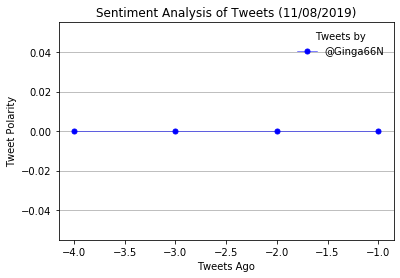

user not in analyzed
@Ginga66N previously analyzed 0 days 04:50:43 ago and posted to Twitter
Nothing plotted to Twitter
user not in analyzed
@Ginga66N previously analyzed 0 days 04:50:43 ago and not posted to Twitter again
Nothing plotted to Twitter
user not in analyzed


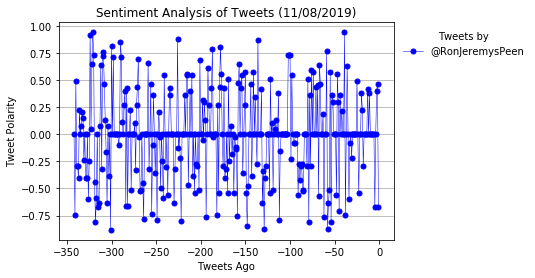

user not in analyzed
@RonJeremysPeen previously analyzed 0 days 05:02:43 ago and posted to Twitter
Nothing plotted to Twitter
user not in analyzed
@RonJeremysPeen previously analyzed 0 days 05:02:43 ago and not posted to Twitter again
Nothing plotted to Twitter
user not in analyzed
@RonJeremysPeen previously analyzed 0 days 05:02:43 ago and not posted to Twitter again
Nothing plotted to Twitter
user not in analyzed


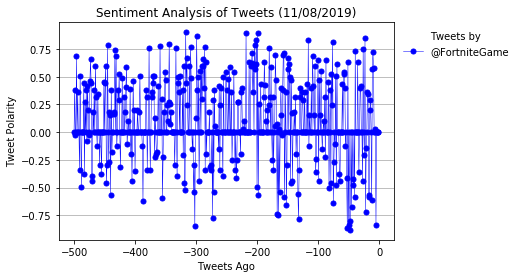

user not in analyzed
@FortniteGame previously analyzed 0 days 05:06:43 ago and posted to Twitter
Nothing plotted to Twitter
user not in analyzed
@FortniteGame previously analyzed 0 days 05:06:43 ago and not posted to Twitter again
Nothing plotted to Twitter
user not in analyzed
@FortniteGame previously analyzed 0 days 05:06:43 ago and not posted to Twitter again
Nothing plotted to Twitter
user not in analyzed
@FortniteGame previously analyzed 0 days 05:06:43 ago and not posted to Twitter again
Nothing plotted to Twitter


In [ ]:
while(True):
    get_tweets(get_user())
    time.sleep(60)

In [ ]:
#mention_tweets = api.mentions_timeline(count=20)
#mention_tweets
#mention_tweets[0]['entities']['user_mentions'][1]['screen_name']
# mention_tweets[0]['in_reply_to_screen_name']
#mention_tweets[0]['user']['name']